In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import MDAnalysis as mda
from tqdm import tqdm
from numpy import linalg as LA
from MDAnalysis.analysis import align
from matplotlib.ticker import FuncFormatter

%run ~/.mpl_set.py

In [2]:
df = pd.read_pickle("./rmsd_nsp10-16.pkl")
df

,sys_name,time_frame,rmsd_all,rmsd_nsp10,rmsd_nsp16
0,comp,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[0.0005033500343547033, 1.128382942405615, 1.1...","[0.000508360874832082, 1.4329209931079394, 1.6...","[0.0005014563430159343, 0.9852074835504431, 0...."
1,comp_sah,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[0.0004911495038199802, 1.0124807557771016, 1....","[0.00048357470470672826, 1.1705811276657037, 1...","[0.0004939909070037616, 0.9440421327698263, 0...."
2,comp_sam,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[0.0005009138767832299, 1.0192082799427413, 1....","[0.0005021372279443683, 1.2035465596185977, 1....","[0.0005004552057541122, 0.9379891010859438, 1...."
3,comp_sfg,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[0.0004881865915213366, 0.9606595362844522, 1....","[0.0004938122082386618, 0.958109858750471, 1.5...","[0.00048594872099992626, 0.9616467783560964, 1..."
4,comp_005,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[0.0004887343223504491, 0.9435454759597969, 1....","[0.0004997901982361395, 1.0920800204137708, 1....","[0.00048443715527680725, 0.87918940861781, 0.9..."
...,...,...,...,...,...
79,comp_sfg_080,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[0.0004962793204808149, 1.155256403746385, 1.4...","[0.0004932213332045072, 1.5247491507114412, 1....","[0.0004974544354499725, 0.9749065271926005, 1...."
80,comp_sfg_085,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[0.0004935100954137438, 1.4149742187784728, 1....","[0.0004906428485842501, 2.176745480113415, 2.3...","[0.0004945969952009221, 0.9698797738359672, 1...."
81,comp_sfg_090,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[0.0004958109362101232, 1.10943620493454, 1.16...","[0.00046972145765267074, 1.4390028218782323, 1...","[0.0005055640033097026, 0.9513196129314498, 1...."
82,comp_sfg_095,"[0.0, 1.0000000328495406, 2.0000000656990813, ...","[0.0005024676063693246, 1.5674586966645365, 2....","[0.0005133481518938711, 2.2334247392930857, 3....","[0.0004981366991204338, 1.21445436713273, 1.68..."


In [3]:
df['time'] = df['time_frame'] / 20

In [4]:
df = df.set_index(['sys_name']).apply(pd.Series.explode).reset_index()

In [5]:
df

,sys_name,time_frame,rmsd_all,rmsd_nsp10,rmsd_nsp16,time
0,comp,0,0.00050335,0.000508361,0.000501456,0
1,comp,1,1.12838,1.43292,0.985207,0.05
2,comp,2,1.16651,1.6247,0.929828,0.1
3,comp,3,1.0769,1.01656,1.09943,0.15
4,comp,4,1.47616,2.03988,1.18747,0.2
...,...,...,...,...,...,...
359995,comp_sfg_100,3995,5.27941,7.34193,4.21579,199.75
359996,comp_sfg_100,3996,5.36107,7.4443,4.28854,199.8
359997,comp_sfg_100,3997,5.4972,7.46382,4.50892,199.85
359998,comp_sfg_100,3998,5.70195,7.60658,4.76218,199.9


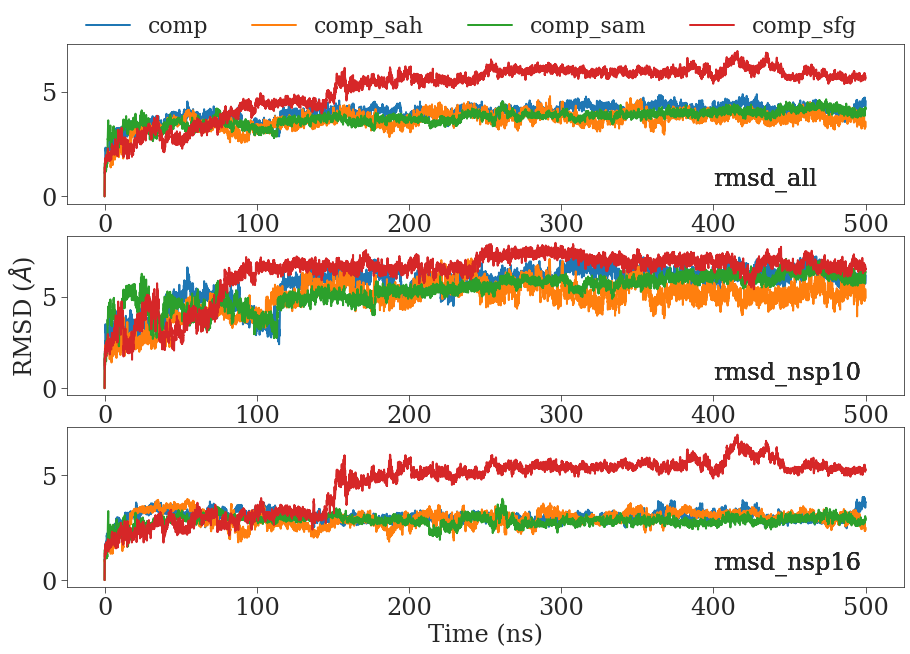

In [6]:
fig, axes = plt.subplots(3, figsize=(15,10)) 
n_traj = 0 

for sys_name in sorted(df.sys_name.unique()): 
    if '0' not in sys_name:
        sub_df = df[df['sys_name'] == sys_name]
        rmsd_cols = sorted([col for col in sub_df.columns if col.startswith('rmsd')])
        for ax, rmsd_col in zip(axes, rmsd_cols):
            ax.plot(sub_df['time_frame'] / 20, sub_df[rmsd_col], label=sys_name) 
            ax.text(400, 0.5, s=rmsd_col)
plt.legend(ncol=4, bbox_to_anchor=(0, 3.7), loc='upper left')
# plt.savefig('rmsd_all.pdf')
plt.xlabel('Time (ns)')
axes[1].set_ylabel(r'RMSD ($\AA$)')
fig.savefig(f"rmsd_000_contact.png", bbox_inches='tight')

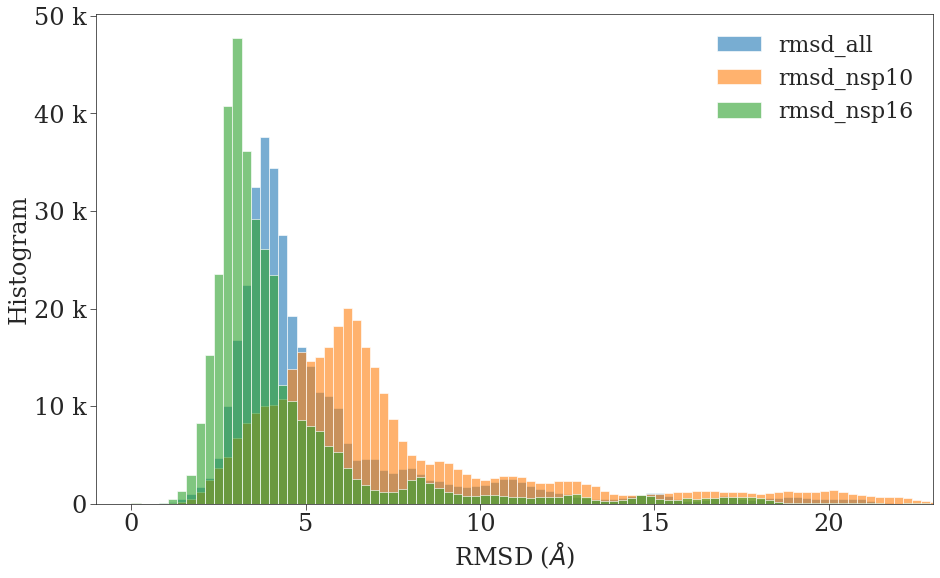

In [7]:
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
#                     print(val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y


fig, ax = plt.subplots(figsize=(15,9))

rmsd_all = df['rmsd_all'].to_list()
# rmsd_nsp10 = df['rmsd_nsp10'].to_list()
# rmsd_nsp16 = df['rmsd_nsp16'].to_list()
# rmsds = [rmsd_all, rmsd_nsp10, rmsd_nsp16]

bins=np.histogram(rmsd_all, bins=100)[1]
for col in df.columns: 
    if col.startswith('rmsd'): 
        _ = ax.hist(df[col].to_list(), bins=bins, label=col, alpha=.6, edgecolor='white') 
    
ax.set_ylabel("Histogram")
ax.set_xlabel(r"RMSD ($\AA$)")
ax.legend()
ax.set_xlim([-1, 23])
#     ax.set_title('')
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
fig.savefig(f"rmsd_hist_total.png", bbox_inches='tight')

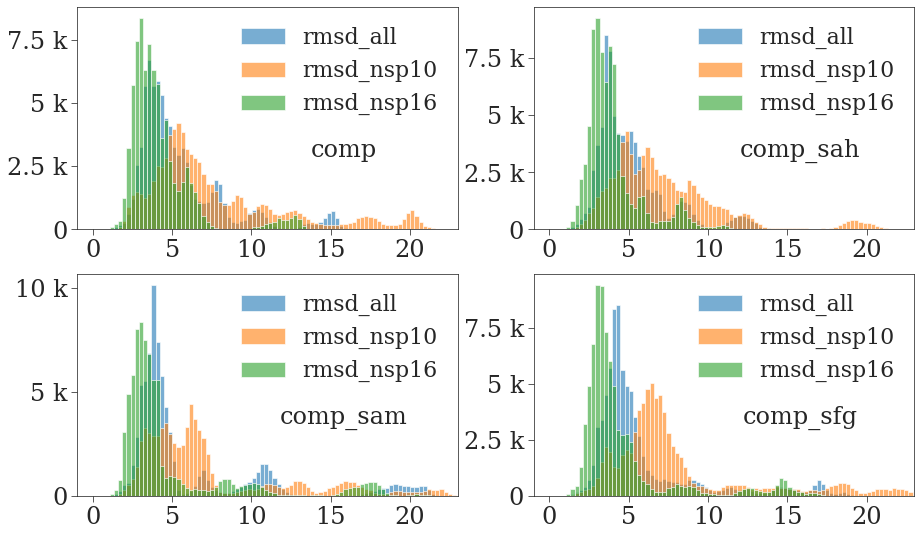

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15,9))

plot_cols = ['rmsd_all', 'rmsd_nsp10', 'rmsd_msp16']

sys_names = [sys_name for sys_name in sorted(df.sys_name.unique())
            if '0' not in sys_name.split('_')[-1]]

rmsd_all = df['rmsd_all'].to_list()
bins=np.histogram(rmsd_all, bins=100)[1]

for ax, sys_name in zip(axes.flatten(), sys_names): 
    sub_df = df[df.sys_name.str.contains(f"{sys_name}_\d+")]
#     print(sub_df.sys_name)
#     continue 
    for col in sub_df.columns: 
        if col.startswith('rmsd'): 
            _ = ax.hist(sub_df[col].to_list(), bins=bins, label=col, alpha=.6, edgecolor='white') 
    ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
    ax.set_title(sys_name, x=0.7, y=0.3)
    ax.legend()
    ax.set_xlim([-1, 23])
    
# ax.set_ylabel("Histogram")
# ax.set_xlabel(r"RMSD ($\AA$)")

# #     ax.set_title('')

fig.savefig(f"rmsd_hist_total_sys.png", bbox_inches='tight')
    

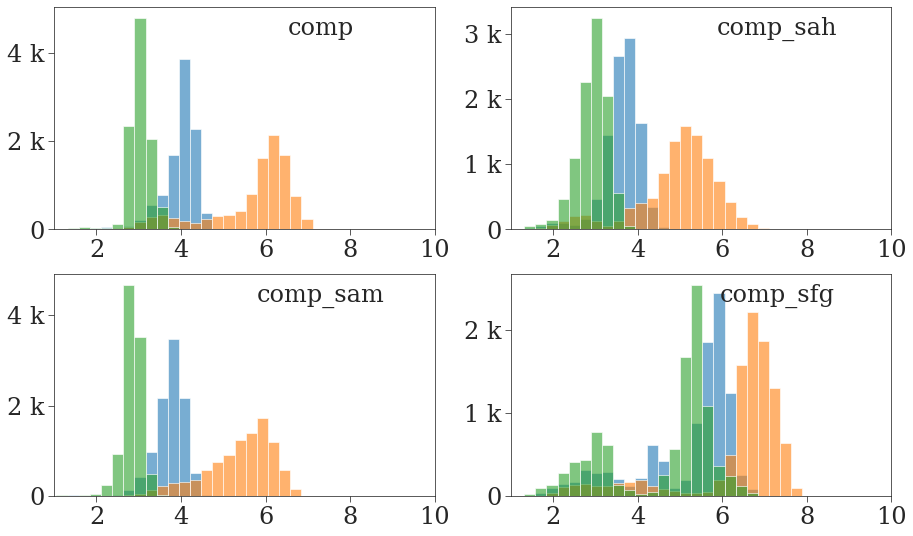

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15,9))

plot_cols = ['rmsd_all', 'rmsd_nsp10', 'rmsd_msp16']

sys_names = [sys_name for sys_name in sorted(df.sys_name.unique())
            if '0' not in sys_name.split('_')[-1]]

rmsd_all = df['rmsd_all'].to_list()
bins=np.histogram(rmsd_all, bins=100)[1]

for ax, sys_name in zip(axes.flatten(), sys_names): 
    sub_df = df[df.sys_name == sys_name]
#     print(sub_df.sys_name)
#     continue 
    for col in sub_df.columns: 
        if col.startswith('rmsd'): 
            _ = ax.hist(sub_df[col].to_list(), bins=bins, label=col, alpha=.6, edgecolor='white') 
    ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
    ax.set_title(sys_name, x=0.7, y=.85)
#     ax.legend()
    ax.set_xlim([1, 10])
    
fig.savefig(f"rmsd_hist_000_sys.png", bbox_inches='tight')